In [2]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# plotting imports
import matplotlib.pyplot as plt

# custom imports
from regression_class import RedditRegression as rr

In [3]:
# infiles
regression_infile = "regression_thread_data.p"
thread_infile = 'clean_5_thread_data.p'

# outfiles
outdir = 'thread_classification'

# make out directory
if not os.path.isdir(outdir):
    os.mkdir(outdir)

In [4]:
# read in files
regression_df = pickle.load(open(regression_infile, 'rb'))
thread_df = pickle.load(open(thread_infile, 'rb'))

In [5]:
posts = {}
comments = {}
for key in thread_df:
    posts[key] = thread_df[key][thread_df[key].id == thread_df[key].thread_id]
    comments[key] = thread_df[key][thread_df[key].id != thread_df[key].thread_id]

# 1. Splitting Comments by sentiment

In [6]:
def classify_sentiment(value, edges):
    if value < edges[0]:
        return -1
    elif value < edges[1]:
        return 0
    else:
        return 1

## 1.1. Even split

In [7]:
edges = [-1+2/3, -1+2*2/3]

In [8]:
def plot_series(series, edges, xlabel='emotion score', ylabel='number of comments', title='Comments vs emotion score', ax=None, **kwargs):
    if not ax:
        fig, ax = plt.subplots(1)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    ticks = [-1+1/3, 0, 1-1/3]
    ax.set_xticks(ticks)
    ax.set_xticklabels(['-1', '0', '1'])

    width = 0.35
    bins = [-1] + edges + [1]

    ax.hist(series, bins=bins, align='mid', rwidth=width, **kwargs)

    if not ax:
        plt.show()
    else:
        return ax


In [9]:
for key in comments:
    comments[key]['even_emotion_score'] = comments[key].body_sentiment_score.apply(classify_sentiment, edges=edges)


/tmp/ipykernel_60780/254412361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments[key]['even_emotion_score'] = comments[key].body_sentiment_score.apply(classify_sentiment, edges=edges)
/tmp/ipykernel_60780/254412361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments[key]['even_emotion_score'] = comments[key].body_sentiment_score.apply(classify_sentiment, edges=edges)
/tmp/ipykernel_60780/254412361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [11]:
comments.pop('thedonald')

,thread_id,id,timestamp,author,domain,parent,score,subject_sentiment_score,body_sentiment_score,date,level,parent_comment,even_emotion_score
290,bjf1u7,em7rs14,2019-05-01 11:37:20,7b4cc416016f7e68262cffee3d4f7001bfe7b53917b7192f,NaN,bjf1u7,10,NaN,-0.051350,2019-05-01,1,em7rs14,0
291,bjf1u7,em7vn4g,2019-05-01 12:30:37,7fcbb232ab68eb4cc3415d73d5cbdbaef7b5607bd661b450,NaN,em7rs14,9,NaN,0.395300,2019-05-01,2,em7rs14,1
292,bjf1u7,em7y1x7,2019-05-01 13:01:18,0c872e9943a14c8e3a012bd63d936c68615acc0e54f87768,NaN,em7vn4g,14,NaN,0.476700,2019-05-01,3,em7rs14,1
293,bjf1u7,em80hgc,2019-05-01 13:29:57,7b4cc416016f7e68262cffee3d4f7001bfe7b53917b7192f,NaN,em7y1x7,2,NaN,0.000000,2019-05-01,4,em7rs14,0
294,bjf1u7,em8902q,2019-05-01 14:55:59,ad9ecc3097bfc947b848af5b0af8d7670d1c44d2d3a2ee15,NaN,bjf1u7,10,NaN,0.000000,2019-05-01,1,em8902q,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,c72dnf,esck78s,2019-06-29 18:05:09,11640fec8a8f4e5b056bae0d7978339da0b82986e847cb03,NaN,c72dnf,1,NaN,-0.458800,2019-06-29,1,esck78s,-1
891,c6csj3,escnawy,2019-06-29 18:43:29,0955d27b1e06412052d946f496a1c65bf0f3f6253361b3d4,NaN,es8bxai,1,NaN,-0.004333,2019-06-29,2,es8bxai,0
892,c705oa,escp4ci,2019-06-29 19:06:04,7b9adfd97f385b8fe5102b22f0538830dedf54bb2a03742d,NaN,c705oa,3,NaN,0.000000,2019-06-29,1,escp4ci,0
893,c5z279,escx58c,2019-06-29 20:47:33,125f8ffa4f40c24d4eed75dcfeb18d2222c656f186df8bc6,NaN,c5z279,1,NaN,0.000000,2019-06-29,1,escx58c,0


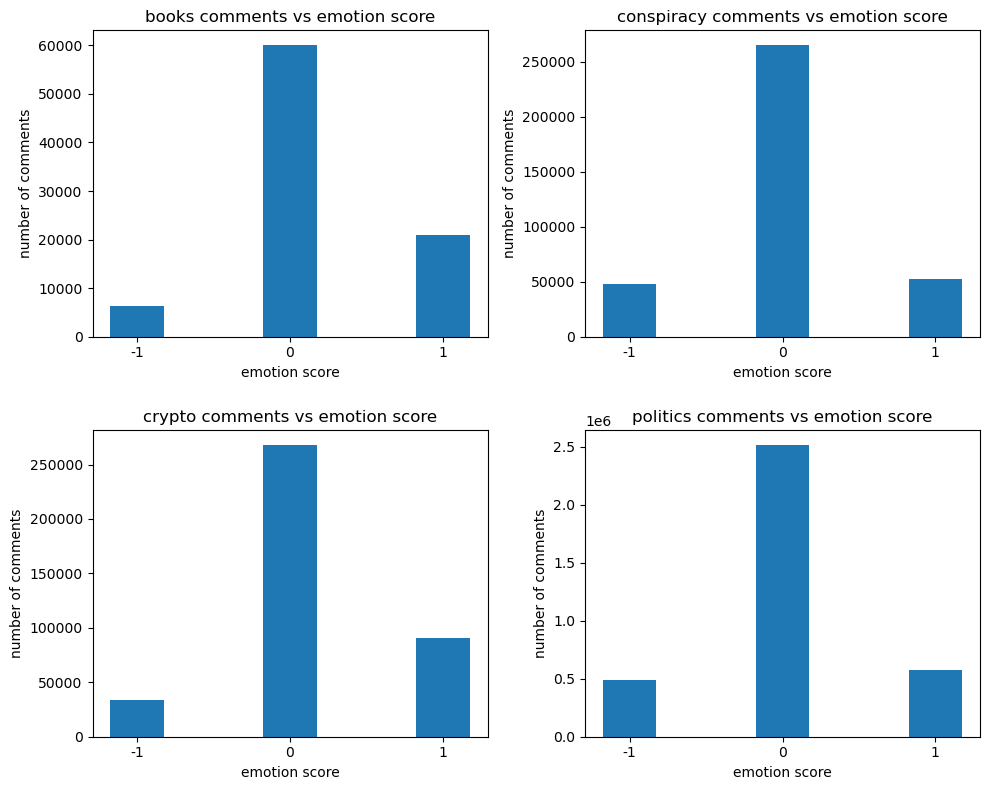

In [12]:
fig, axes = plt.subplots(2,2, figsize=(10,8))

i=0
j=0

for key in comments:
    plot_series(comments[key].even_emotion_score, edges, title=f'{key} comments vs emotion score', ax=axes[i,j])
    j = (j+1) % 2
    if j == 0:
        i += 1
plt.tight_layout()
plt.show()

## 1.2. By quantiles
### 1.2.1. Over all comments

In [13]:
quantiles = {}
quantile_edges = {}
for key in comments:
    quantiles[key] = comments[key].body_sentiment_score.quantile(q=[1/3, 2/3])
    quantile_edges[key] = list(quantiles[key].values)
    comments[key]['quantile_emotion_score'] = comments[key].body_sentiment_score.apply(classify_sentiment, edges=quantile_edges[key])

/tmp/ipykernel_60780/2929270838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments[key]['quantile_emotion_score'] = comments[key].body_sentiment_score.apply(classify_sentiment, edges=quantile_edges[key])
/tmp/ipykernel_60780/2929270838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments[key]['quantile_emotion_score'] = comments[key].body_sentiment_score.apply(classify_sentiment, edges=quantile_edges[key])
/tmp/ipykernel_60780/2929270838.py:6: SettingWithCopyWarning: 
A value is trying to 

In [14]:
quantile_edges

{'books': [0.0, 0.23835],
 'conspiracy': [-0.05135, 0.06553333333333333],
 'crypto': [0.0, 0.1953],
 'politics': [-0.050575, 0.100475]}

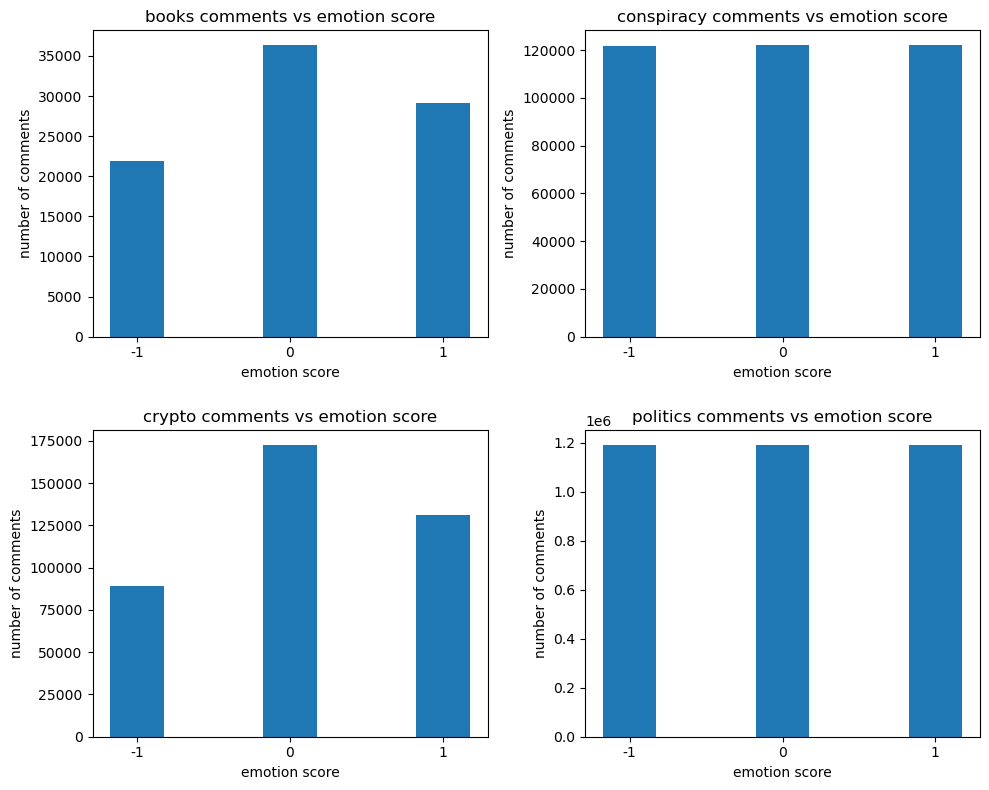

In [15]:
fig, axes = plt.subplots(2,2, figsize=(10,8))

i=0
j=0

for key in comments:
    plot_series(comments[key].quantile_emotion_score, edges, title=f'{key} comments vs emotion score', ax=axes[i,j])
    j = (j+1) % 2
    if j == 0:
        i += 1
plt.tight_layout()
plt.show()

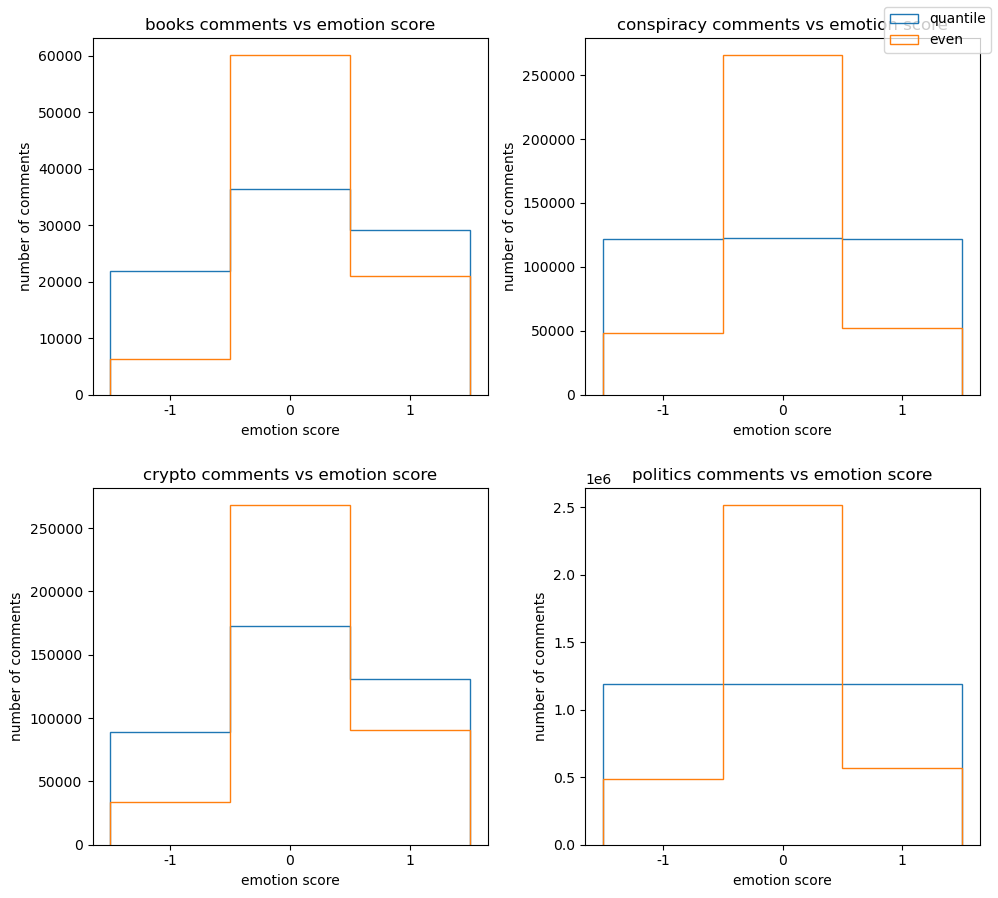

In [16]:
fig, axes = plt.subplots(2,2, figsize=(10,9))

i=0
j=0

for key in comments:
    plot_series(comments[key].quantile_emotion_score, edges, title=f'{key} comments vs emotion score', ax=axes[i,j], histtype='step', label='quantile')
    plot_series(comments[key].even_emotion_score, edges, title=f'{key} comments vs emotion score', ax=axes[i,j], histtype='step', label='even')
    j = (j+1) % 2
    if j == 0:
        i += 1
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(labels)
plt.tight_layout()
plt.show()

# 2. Getting ratios of positive & negative comments
## 2.1. Over entire subreddit

In [17]:
lookup_vals = {
    'positive': 1,
    'negative': -1
}

subreddit_ratios = {}
subreddit_ratios_df = {}
for subreddit in comments:
    subreddit_ratios[subreddit] = {}

    emotion_score_lookups = {
        'even': comments[subreddit].even_emotion_score,
        'quantile': comments[subreddit].quantile_emotion_score
    }

    for key in emotion_score_lookups:
        subreddit_ratios[subreddit][key] = {}
        for type in lookup_vals:
            subreddit_ratios[subreddit][key][type] = (
                len(emotion_score_lookups[key][emotion_score_lookups[key] == lookup_vals[type]])/
                len(emotion_score_lookups[key])
            )
    subreddit_ratios_df[subreddit] = pd.DataFrame.from_dict(subreddit_ratios[subreddit], orient='index')



In [18]:
for key in subreddit_ratios_df:
    print(key)
    display(subreddit_ratios_df[key])

books


,positive,negative
even,0.23961,0.072413
quantile,0.33341,0.250212


conspiracy


,positive,negative
even,0.142794,0.131821
quantile,0.333345,0.332831


crypto


,positive,negative
even,0.231334,0.086375
quantile,0.333460,0.227226


politics


,positive,negative
even,0.159781,0.136434
quantile,0.333427,0.333323


## 2.2. For each thread

In [19]:
comments_by_thread = {}
for key in comments:
    comments_by_thread[key] = comments[key].groupby(by='thread_id')

In [20]:
def get_ratios(group, col, val=1):
    df = group[col]
    ratio = len(df[df==val])/len(df)
    return ratio


In [21]:
group_vals = {
    'positive': 1,
    'neutral': 0,
    'negative': -1,
}

In [22]:
ratios_by_thread_even = {}
ratios_by_thread_quantile = {}
for subreddit in comments_by_thread:
    ratios_by_thread_even[subreddit] = {}
    ratios_by_thread_quantile[subreddit] = {}
    for key in group_vals:
        ratios_by_thread_even[subreddit][key] = comments_by_thread[subreddit].apply(get_ratios, col='even_emotion_score', val=group_vals[key])
        ratios_by_thread_quantile[subreddit][key] = comments_by_thread[subreddit].apply(get_ratios, col='quantile_emotion_score', val=group_vals[key])

In [23]:
ratios = {}
for subreddit in ratios_by_thread_even:
    ratios[subreddit] = {
        'even': pd.DataFrame.from_dict(ratios_by_thread_even[subreddit]),
        'quantile': pd.DataFrame.from_dict(ratios_by_thread_quantile[subreddit]),
    }

# 3. Classifying threads

In [24]:
def classify_thread(row, subreddit, type):
    if (
        (row.positive <= subreddit_ratios[subreddit][type]['positive']) &
        (row.negative <= subreddit_ratios[subreddit][type]['negative'])
    ):
        return 'neutral'
    elif (
        (row.positive > subreddit_ratios[subreddit][type]['positive']) &
        (row.negative <= subreddit_ratios[subreddit][type]['negative'])
    ):
        return 'positive'
    
    elif (
        (row.positive <= subreddit_ratios[subreddit][type]['positive']) &
        (row.negative > subreddit_ratios[subreddit][type]['negative'])
    ):
        return 'negative'
    else:
        return 'bipolar'

In [25]:
thread_classifications = {}
for subreddit in ratios:
    thread_classifications[subreddit] = {}
    for key in ratios[subreddit]:
        thread_classifications[subreddit][key] = ratios[subreddit][key].apply(classify_thread, subreddit=subreddit, type=key, axis=1)

In [26]:
for subreddit in thread_classifications:
    thread_classifications[subreddit] = pd.DataFrame.from_dict(thread_classifications[subreddit])
    print(subreddit)
    display(thread_classifications[subreddit])

books


,even,quantile
thread_id,,
xsj48b,positive,positive
xsjglc,negative,negative
xsljkn,neutral,negative
xsnhk2,neutral,negative
xsnypq,neutral,positive
...,...,...
yhon8o,negative,negative
yhq6yv,neutral,neutral
yhqbwj,negative,negative


conspiracy


,even,quantile
thread_id,,
xsgmuu,bipolar,bipolar
xsgxtg,negative,negative
xsgyyt,bipolar,neutral
xsgzjq,negative,negative
xsh14k,neutral,neutral
...,...,...
yhtzep,positive,positive
yhu2be,neutral,positive
yhugg8,neutral,neutral


crypto


,even,quantile
thread_id,,
xsglev,positive,neutral
xsgz7t,bipolar,negative
xshhap,neutral,positive
xshhne,neutral,neutral
xshkp3,bipolar,bipolar
...,...,...
yht270,positive,positive
yht306,negative,negative
yhtdk6,positive,positive


politics


,even,quantile
thread_id,,
j2wrx2,negative,negative
j2wrzn,positive,positive
j2wtrf,positive,positive
j2ww0y,positive,positive
j2wx6r,bipolar,negative
...,...,...
jxebby,neutral,neutral
jxebdv,neutral,neutral
jxebe0,positive,positive


In [27]:
classified_threads = {}
for subreddit in thread_classifications:
    classified_threads[subreddit] = regression_df[subreddit].merge(thread_classifications[subreddit].reset_index(), on='thread_id')

In [28]:
classified_threads['books']

,thread_id,thread_size,authors,timestamp,author,score,subject_sentiment_score,sentiment_sign,sentiment_magnitude,success,log_thread_size,log_authors,log_score,even,quantile
0,xsj48b,2,2,2022-10-01 02:00:53,6d8b4b082546bd41309a4d0f9365a1681ff4d5698c01193c,1,0.18266,1.0,0.18266,1,0.693147,0.693147,0.693147,positive,positive
1,xsjglc,231,154,2022-10-01 02:17:55,cd62e77d479ac5e366ed912848c6144eefb45ef35b678683,1,-0.47670,-1.0,0.47670,1,5.442418,5.036953,0.693147,negative,negative
2,xsljkn,3,3,2022-10-01 04:04:01,930922daecf04508b2c50e71be3a8cb359c6551264aaab03,1,0.27320,1.0,0.27320,1,1.098612,1.098612,0.693147,neutral,negative
3,xsnhk2,21,14,2022-10-01 05:52:35,151ff09d2fbac6fe645ccb07ce7f3753483dcc19f409534c,1,0.00000,0.0,0.00000,1,3.044522,2.639057,0.693147,neutral,negative
4,xsnypq,38,36,2022-10-01 06:20:28,3e38c25bcdc3fa315de702a51f168e948c145037fd0948bd,1,0.00000,0.0,0.00000,1,3.637586,3.583519,0.693147,neutral,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,yhon8o,11,5,2022-10-30 20:14:35,bbf12154ff1b9cacd283269fd68a6cd5bab2f83b32e384b9,1,0.59940,1.0,0.59940,1,2.397895,1.609438,0.693147,negative,negative
1553,yhq6yv,5,4,2022-10-30 21:16:21,4b9eab53480f7914a7ec899782e33ce900eb8488c82d3a9e,1,-0.39225,-1.0,0.39225,1,1.609438,1.386294,0.693147,neutral,neutral
1554,yhqbwj,5,5,2022-10-30 21:21:52,4d335595413f2028265ff478ef09ffa55f188049cef31525,1,-0.77170,-1.0,0.77170,1,1.609438,1.609438,0.693147,negative,negative
1555,yhqqra,2,2,2022-10-30 21:39:09,d7947acc54d7fece4171cb3e2326a4b206ece5e64f8b734f,1,0.00000,0.0,0.00000,1,0.693147,0.693147,0.693147,neutral,neutral


In [29]:
for subreddit in classified_threads:
    print(subreddit, len(regression_df[subreddit]), len(regression_df[subreddit][regression_df[subreddit].thread_size > 1]), len(classified_threads[subreddit]))


books 4776 1557 1557
conspiracy 11395 9675 9675
crypto 14818 6770 6770
politics 65343 42653 42653


In [30]:
xcol = 'thread_size'
thread_classification_names = ['positive', 'neutral', 'negative', 'bipolar']

In [31]:
grouped_counts = {}
for subreddit in classified_threads:
    grouped_counts[subreddit] = {}
    for type in ['even', 'quantile']:
        grouped_counts[subreddit][type] = {}
        for key in thread_classification_names:
            grouped_counts[subreddit][type][key] = (
                classified_threads[subreddit][classified_threads[subreddit][type] == key][['thread_id', 'thread_size']]
                .groupby('thread_size').size().reset_index().rename(columns={0: 'counts'})
            )
            grouped_counts[subreddit][type][key]['pdf'] = grouped_counts[subreddit][type][key].counts/grouped_counts[subreddit][type][key].counts.sum()
            grouped_counts[subreddit][type][key]['cdf'] = grouped_counts[subreddit][type][key].pdf.cumsum()
            grouped_counts[subreddit][type][key]['ccdf'] = 1 - grouped_counts[subreddit][type][key].cdf

In [32]:
grouped_counts['books']['even']['positive']

,thread_size,counts,pdf,cdf,ccdf
0,2,53,0.080303,0.080303,9.196970e-01
1,3,65,0.098485,0.178788,8.212121e-01
2,4,60,0.090909,0.269697,7.303030e-01
3,5,62,0.093939,0.363636,6.363636e-01
4,6,20,0.030303,0.393939,6.060606e-01
...,...,...,...,...,...
125,1045,1,0.001515,0.993939,6.060606e-03
126,1301,1,0.001515,0.995455,4.545455e-03
127,1465,1,0.001515,0.996970,3.030303e-03
128,1607,1,0.001515,0.998485,1.515152e-03


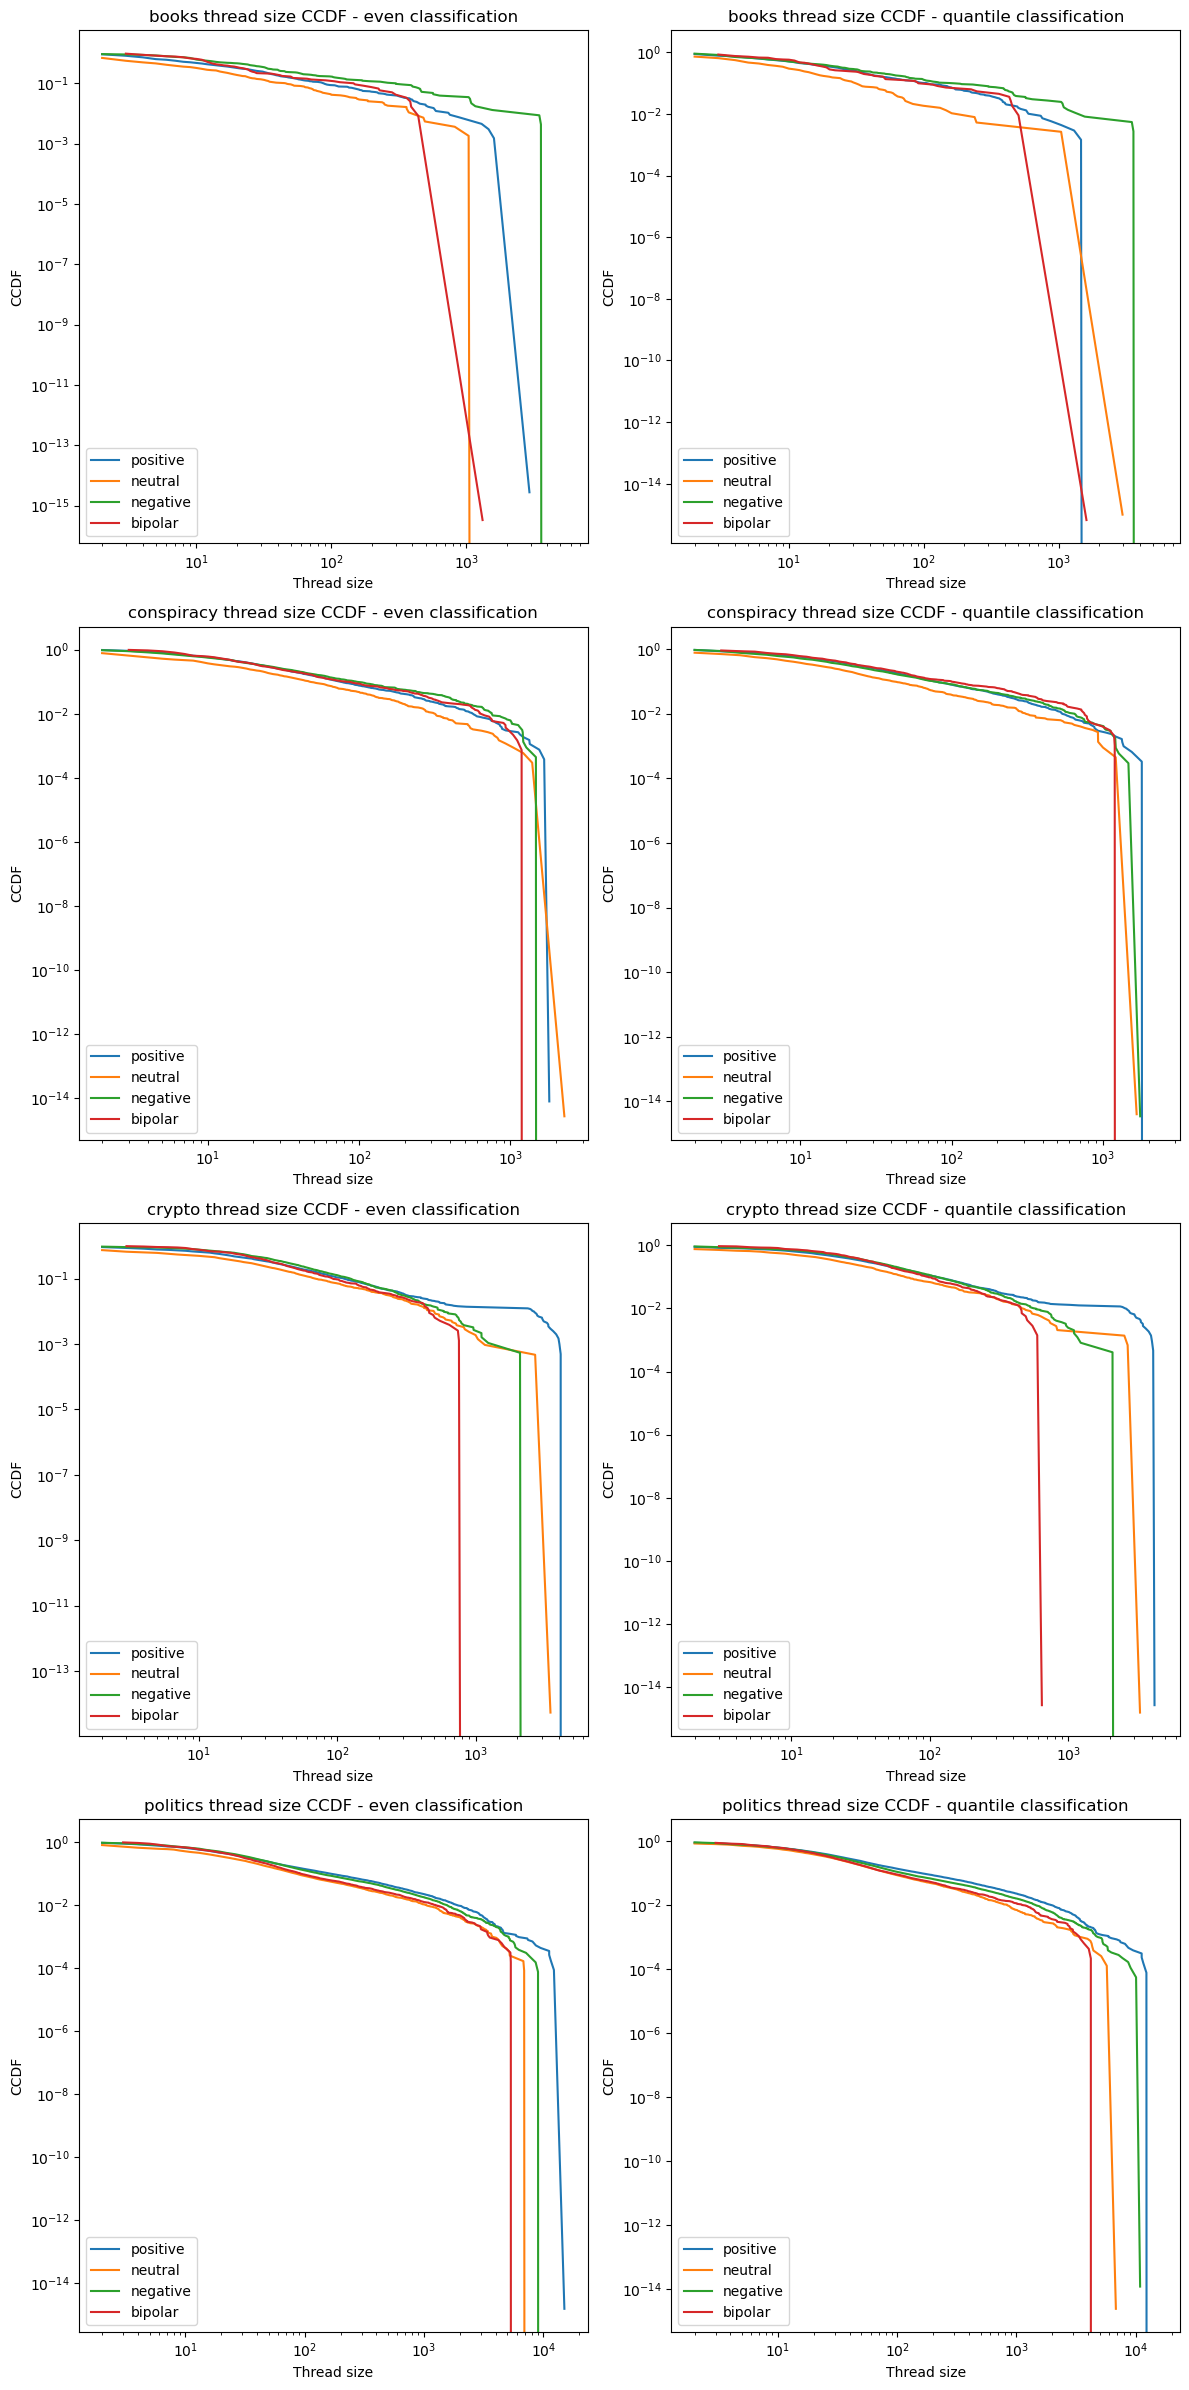

In [33]:
fig, axes = plt.subplots(4,2, figsize=(12, 24))
i=0
j=0

for subreddit in grouped_counts:
    for type in grouped_counts[subreddit]:
        for key in grouped_counts[subreddit][type]:
            axes[i,j].plot(grouped_counts[subreddit][type][key].thread_size, grouped_counts[subreddit][type][key].ccdf, label=key, )
        axes[i,j].set_xlabel('Thread size')
        axes[i,j].set_ylabel('CCDF')
        axes[i,j].set_title(f'{subreddit} thread size CCDF - {type} classification')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xscale('log')
        axes[i,j].legend()
        j = (j+1)%2
    i += 1
plt.tight_layout()
plt.show()


In [34]:
data_sizes = {}
for subreddit in grouped_counts:
    data_sizes[subreddit] = {}
    for type in grouped_counts[subreddit]:
        data_sizes[subreddit][type] = {}
        for key in grouped_counts[subreddit][type]:
            data_sizes[subreddit][type][key] = len(classified_threads[subreddit][classified_threads[subreddit][type] == key])

In [35]:
for subreddit in data_sizes:
    print(subreddit)
    display(pd.DataFrame.from_dict(data_sizes[subreddit]))

books


,even,quantile
positive,660,694
neutral,549,382
negative,229,369
bipolar,119,112


conspiracy


,even,quantile
positive,2657,3053
neutral,3392,2234
negative,2267,3417
bipolar,1359,971


crypto


,even,quantile
positive,2020,2159
neutral,2124,1454
negative,1849,2449
bipolar,777,708


politics


,even,quantile
positive,11349,12688
neutral,11914,7707
negative,13017,17709
bipolar,6373,4549


In [38]:
outfile = outdir + '/regression_classified_thread_data.p'
pickle.dump(classified_threads, open(outfile, 'wb'))

In [39]:
grouped_counts['books']['quantile']['negative']

,thread_size,counts,pdf,cdf,ccdf
0,2,38,0.102981,0.102981,8.970190e-01
1,3,31,0.084011,0.186992,8.130081e-01
2,4,42,0.113821,0.300813,6.991870e-01
3,5,15,0.040650,0.341463,6.585366e-01
4,6,10,0.027100,0.368564,6.314363e-01
...,...,...,...,...,...
100,1323,1,0.002710,0.989160,1.084011e-02
101,1561,1,0.002710,0.991870,8.130081e-03
102,3486,1,0.002710,0.994580,5.420054e-03
103,3583,1,0.002710,0.997290,2.710027e-03


In [40]:
grouped_counts['books']['quantile']['negative'].tail(60)

,thread_size,counts,pdf,cdf,ccdf
45,56,1,0.00271,0.807588,1.924119e-01
46,59,3,0.00813,0.815718,1.842818e-01
47,61,2,0.00542,0.821138,1.788618e-01
48,62,1,0.00271,0.823848,1.761518e-01
49,67,2,0.00542,0.829268,1.707317e-01
50,71,2,0.00542,0.834688,1.653117e-01
51,73,1,0.00271,0.837398,1.626016e-01
52,74,2,0.00542,0.842818,1.571816e-01
53,77,2,0.00542,0.848238,1.517615e-01
54,78,2,0.00542,0.853659,1.463415e-01


Artifacts at end of plots are due to 
- computational error - CCDF is 1-CDF and clearly here CDF is 1, and CCDF should be 0
- large thread sizes being very sparsely populated. Define a cutoff? How to define?


In [41]:
grouped_counts['crypto']['quantile']['negative'].tail(30)

,thread_size,counts,pdf,cdf,ccdf
251,529,1,0.000408,0.988158,1.184157e-02
252,530,1,0.000408,0.988567,1.143324e-02
253,531,1,0.000408,0.988975,1.102491e-02
254,543,1,0.000408,0.989383,1.061658e-02
255,559,1,0.000408,0.989792,1.020825e-02
256,587,1,0.000408,0.990200,9.799918e-03
257,588,1,0.000408,0.990608,9.391588e-03
258,629,1,0.000408,0.991017,8.983258e-03
259,632,1,0.000408,0.991425,8.574929e-03
260,668,1,0.000408,0.991833,8.166599e-03
